In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Считываем датасет и отделяем целевую переменную от выборки.

In [28]:
data = pd.read_csv('housing.csv', header=None,delimiter='\s+')
X = data[range(13)]
y = data[13]

Рассмотрим поведение при выкидывании признаков - будем оставлять только первые N столбцов (N будет четным) и для каждого полученного случая измерять ошибку. В качестве метрик будем использовать MSE, MAE и R2. 

In [29]:
lr = LinearRegression()
num_features = list(range(2, 13, 2))
metrics = {'mse': [], 'mae': [], 'r2': []}

for i in num_features:
    X_subset = X[range(i)]
    y_pred = lr.fit(X_subset, y).predict(X_subset)
    metrics['mse'].append(mean_squared_error(y, y_pred))
    metrics['mae'].append(mean_absolute_error(y, y_pred))
    metrics['r2'].append(r2_score(y, y_pred))

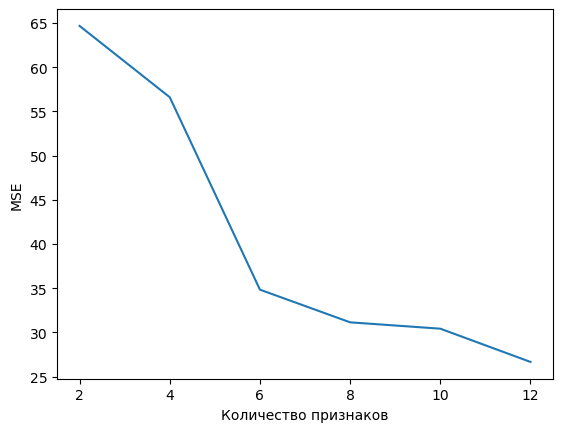

In [30]:
plt.plot(num_features, metrics['mse'])
plt.xlabel("Количество признаков")
plt.ylabel("MSE")
plt.show()

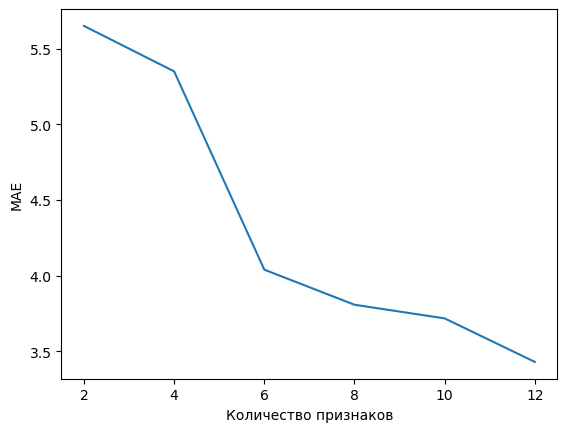

In [31]:
plt.plot(num_features, metrics['mae'])
plt.xlabel("Количество признаков")
plt.ylabel("MAE")
plt.show()

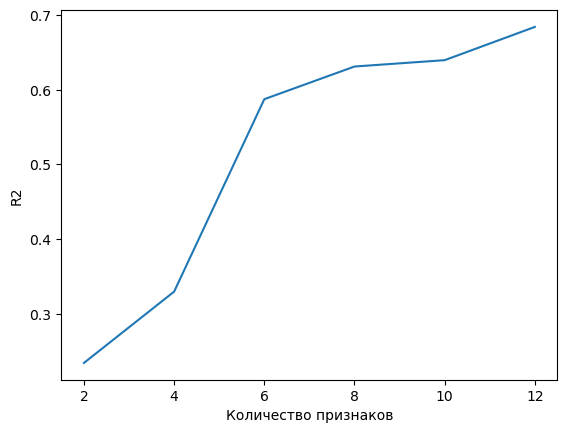

In [ ]:
plt.plot(num_features, metrics['r2'])
plt.xlabel("Количество признаков")
plt.ylabel("R2")
plt.show()

Мы видим, что качество модели увеличивается с ростом признаков. В случае MSE и MAE ошибка уменьшается, а в случае R2 метрика растет.

Теперь исследуем зависимость от кол-ва элементов в выборке - будем оставлять только первые N элементов, где N будет меняться с шагом 100.

In [33]:
lr = LinearRegression()
num_samples = list(range(100, X.shape[0], 100))
metrics = {'mse': [], 'mae': [], 'r2': []}

for samples in num_samples:
    X_subset = X[:samples]
    y_subset = y[:samples]
    y_pred = lr.fit(X_subset, y_subset).predict(X_subset)
    metrics['mse'].append(mean_squared_error(y_subset, y_pred))
    metrics['mae'].append(mean_absolute_error(y_subset, y_pred))
    metrics['r2'].append(r2_score(y_subset, y_pred))

Построим графики зависимости ошибок от количества данных.

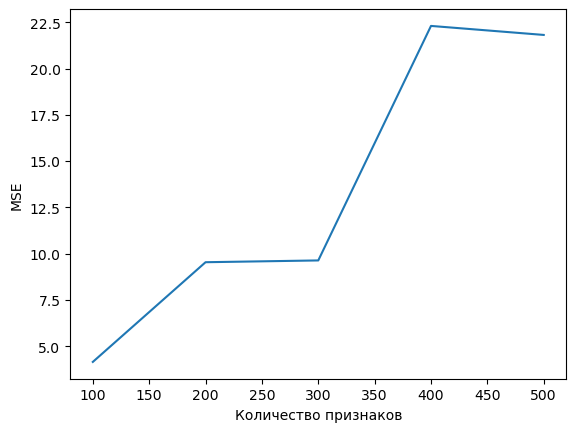

In [34]:
plt.plot(num_samples, metrics['mse'])
plt.xlabel("Количество признаков")
plt.ylabel("MSE")
plt.show()

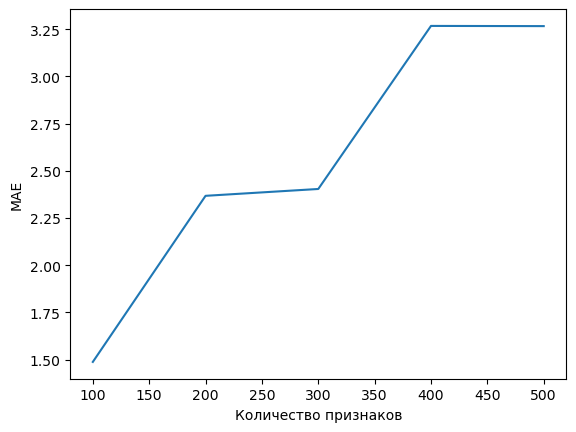

In [35]:
plt.plot(num_samples, metrics['mae'])
plt.xlabel("Количество признаков")
plt.ylabel("MAE")
plt.show()

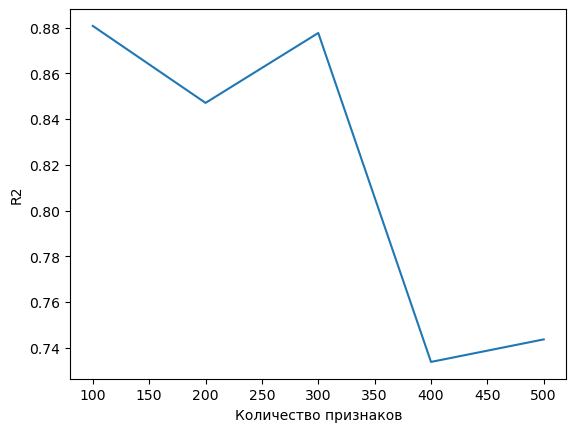

In [36]:
plt.plot(num_samples, metrics['r2'])
plt.xlabel("Количество признаков")
plt.ylabel("R2")
plt.show()

Качество модели увеличивается с ростом числа элементов. При этом при приближении к максимальному числу признаков качество перестает расти, и даже немного ухудшается. Видимо это связано, с тем что признаков становится слишком много и модели становится тяжелее линейно под них подстроиться.

Теперь оставим только первые два признака в выборке, обучим на них линейную регрессию. Отобразим данные и полученную плоскость решения на трехмерном рисунке.

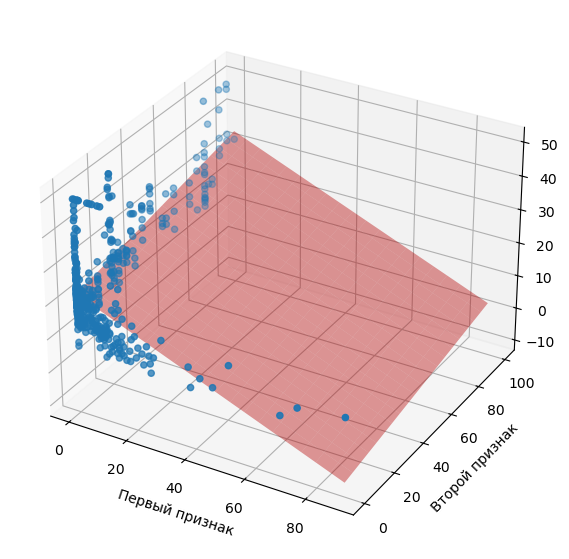

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x1 = X.iloc[:, 0]
x2 = X.iloc[:, 1]

ax.scatter(x1, x2, y)

x1_range = np.linspace(x1.min(), x1.max(), 20)
x2_range = np.linspace(x2.min(), x2.max(), 20)
X_plot, Y_plot = np.meshgrid(x1_range, x2_range)

Z_plot = lr.predict(np.c_[X_plot.ravel(), Y_plot.ravel()]).reshape(X_plot.shape)

ax.plot_surface(X_plot, Y_plot, Z_plot, alpha=0.4, color='red')

ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

plt.show()